# Problem Statement
Use relevant machine learning model to predict total sales using features like money spent on Advertising / Marketing individual fields.

### import basic libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### load dataset

In [2]:
data=pd.read_csv("Advertising.csv")

In [3]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
# drop the unnamed column
data.drop('Unnamed: 0',axis=1,inplace=True)

### Basic Checks

In [5]:
# shape
data.shape

(200, 4)

In [6]:
# print all columns
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
# dtypes
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [8]:
# head
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
# tail
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
# describe
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Insights
* Average sales made by the company is 14.02m$
* Average Amount spent on TV is more compared to Radio and Newspaper.
* Maximum amount spent on TV advertising is more compared to Radio and Newspaper

In [12]:
# Check for missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Exploratory Data Analysis

### univariate analysis
* Analysing single variable/column/feature
* check the distribution of each column

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

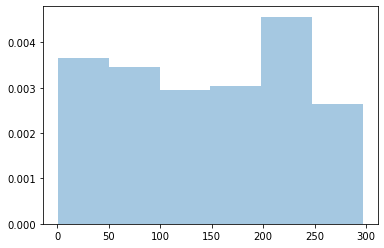

In [13]:
# Check distribution of TV
sns.distplot(x=data.TV)

In [ ]:
# check distribution of Radio
sns.distplot(x=data.Radio)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

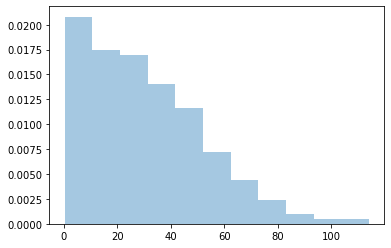

In [14]:
# check distribution of Newspaper
sns.distplot(x=data.Newspaper,kde=True)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

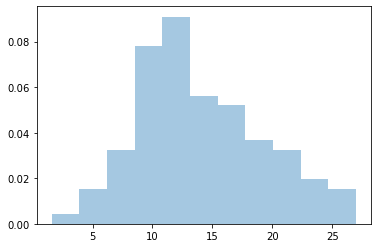

In [15]:
# check distribution of sales
sns.distplot(x=data.Sales,kde=True)

#### Bivariate analysis
Analysing two variables

<AxesSubplot:xlabel='TV', ylabel='Sales'>

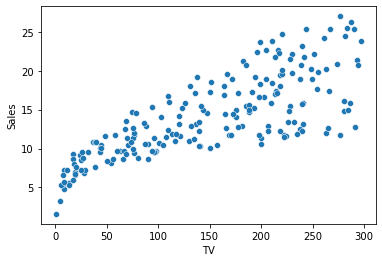

In [16]:
# Analyse how amount spent on TV impact sales
sns.scatterplot(data=data,x='TV',y='Sales')


<AxesSubplot:xlabel='Radio', ylabel='Sales'>

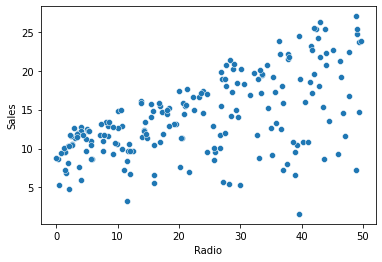

In [17]:
# Analyse how amount spent on Radio impact sales
sns.scatterplot(data=data,x='Radio',y='Sales')


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

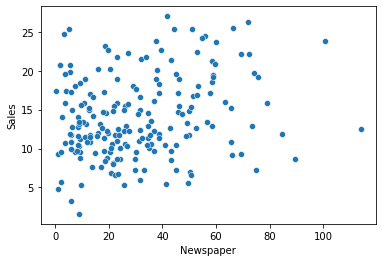

In [18]:
# Analyse how amount spent on Newspaper impact sales
sns.scatterplot(data=data,x='Newspaper',y='Sales')


#### Multivariate analysis

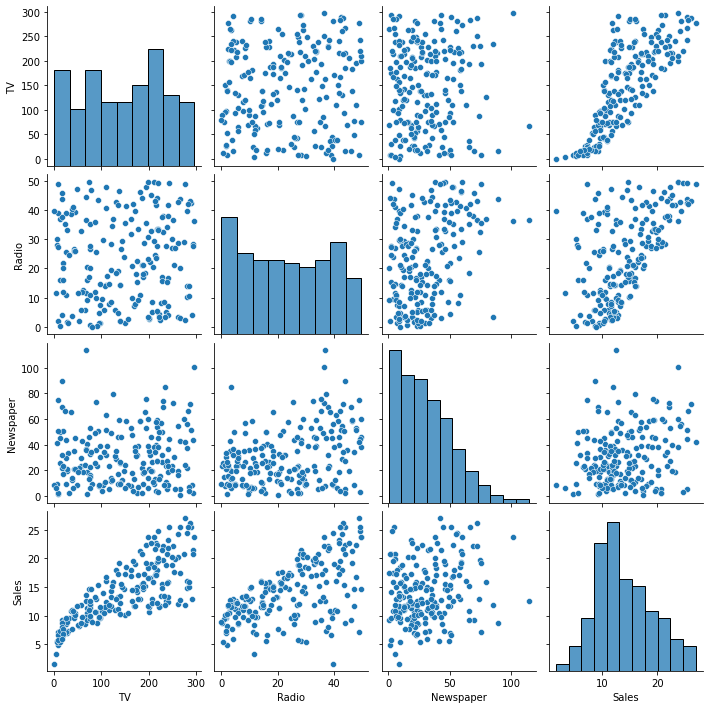

In [19]:
sns.pairplot(data)

# Data Preprocessing

In [20]:
# check for missing values and handle them
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# check for duplicates

In [21]:
data.duplicated().sum()

0

In [22]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# Check for outliers

<AxesSubplot:xlabel='TV'>

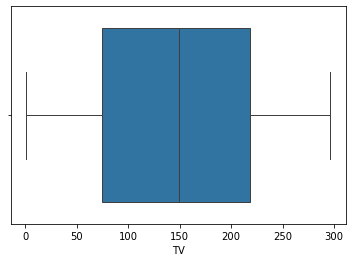

In [23]:
# check outliers in TV
sns.boxplot(x=data.TV)

<AxesSubplot:xlabel='Radio'>

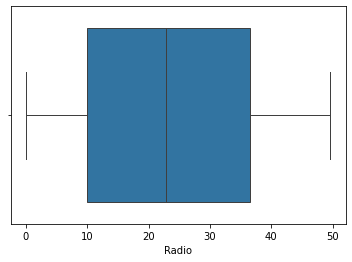

In [24]:
# Check outliers in Radio
sns.boxplot(x=data.Radio)

<AxesSubplot:xlabel='Newspaper'>

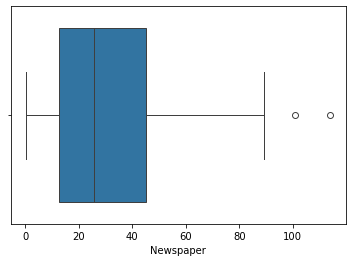

In [25]:
# check outliers in Newspaper
sns.boxplot(x=data.Newspaper)

<AxesSubplot:xlabel='Sales'>

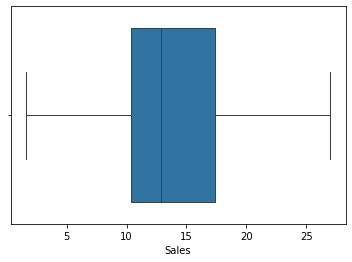

In [26]:
# check outliers in Sales
sns.boxplot(x=data.Sales)

In [27]:
# We can see that there are few outliers in Newspaper column
# outliers in Newspaper are seen toward right side

In [28]:
# How to find those outliers
# IQR- Use this method when data is not normal
# 3-sigma rule - use this method when data is normal

In [29]:
# find Q1 and Q3
Q1=data['Newspaper'].quantile(0.25)
print("lower quartile",Q1)
Q3=data['Newspaper'].quantile(0.75)
print("upper quartile",Q3)


lower quartile 12.75
upper quartile 45.1


In [30]:
# find IQR
IQR=Q3-Q1
IQR

32.35

In [31]:
# find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print("lower limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower limit is -35.775000000000006
upper_limit is 93.625


In [32]:
# find values above upper_limit
data.loc[data['Newspaper']>upper_limit]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [33]:
len(data.loc[data['Newspaper']>upper_limit])/len(data)

0.01

In [34]:
# find values below lower limit
data.loc[data['Newspaper']<lower_limit]

,TV,Radio,Newspaper,Sales


In [35]:
# How to handle outliers
# since data is not normal will replace outliers with median
data.loc[data['Newspaper']>upper_limit,"Newspaper"]=data["Newspaper"].median()

<AxesSubplot:xlabel='Newspaper'>

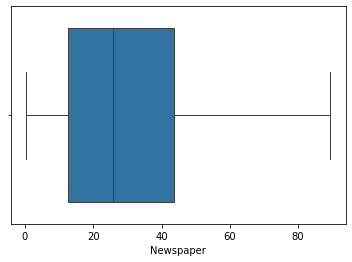

In [36]:
# check are there any outliers in Newspaper
sns.boxplot(x=data.Newspaper)

In [37]:
# Skipping scaling

In [38]:
# Skipping converting categorical data into numerical data

# Feature Engineering

In [39]:
# drop irrelevant columns
# Selecting best features
* Drop the columns which has very less correlation with target variables.
* Drop one of the column if two input variables has high correlation

SyntaxError: invalid syntax (1293416798.py, line 3)

In [40]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.782224
Radio,0.054809,1.000000,0.343141,0.576223
Newspaper,0.048462,0.343141,1.000000,0.215938
Sales,0.782224,0.576223,0.215938,1.000000


<AxesSubplot:>

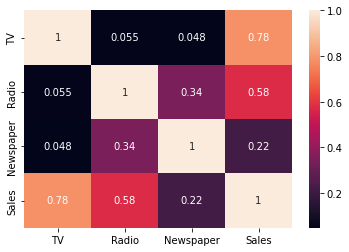

In [41]:
sns.heatmap(data.corr(),annot=True)
# annot=True is used for labelling the corr values
# In this Newspaper has very less correlation with sales, since dataset is small we are not dropping Newspaper.

<AxesSubplot:>

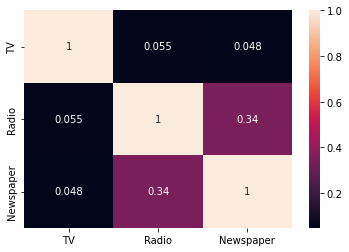

In [42]:
# check for multicollinearity- there shoud not be any high correlation among input variables
sns.heatmap(data.drop("Sales",axis=1).corr(),annot=True)

### Split data into x and y

In [43]:
x=data.drop("Sales",axis=1)
y=data['Sales']

### Split data for training and testing

# Sklearn
It is one of the scientific library which includes all the packages related to Machine learning, data cleaning and feature engineering

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [45]:
x_train.shape

(140, 3)

In [46]:
x_test.shape

(60, 3)

# Model Building

In [47]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression
# initialise model
model=LinearRegression()
# Train model with x_train and y-train
model.fit(x_train,y_train)

LinearRegression()

In [48]:
# make predictions /test model
y_pred=model.predict(x_test)
y_pred

array([17.11920196, 16.86343137, 21.80867738, 24.55443423, 12.3155194 ,
       20.92742165, 10.10412313, 12.37902465, 11.99570844, 16.95369111,
       22.81007152, 15.1981792 ,  8.4657263 , 14.88506108, 18.54549016,
       18.5612111 , 18.70116245, 14.50770633,  9.74439917, 20.58825997,
       14.89035187, 17.71204411, 23.05479076,  7.72066599, 21.4435882 ,
       19.61759881, 13.81348356, 11.64299601, 18.42933279, 12.21072397,
       11.41183731,  9.96393166, 13.49958752, 15.19317807, 18.10601562,
        6.92406996, 14.20072023, 14.27620674, 14.10646271, 10.77352628,
       14.84385103, 11.94916737, 10.70309421, 10.40075312,  6.20529208,
       16.82109527, 16.46119818, 12.07762468, 10.73444639, 20.86473587,
       15.08126005, 15.41063402, 12.79667983, 14.11738167, 12.36964978,
        9.02390838, 20.50392858,  9.34145403,  5.36475925,  8.24787047])

In [49]:
y_test

11     17.4
99     17.2
128    24.7
175    27.0
1      10.4
111    21.8
90     11.2
177    11.7
88     12.9
187    17.3
61     24.2
199    13.4
191     9.9
123    15.2
184    17.6
188    15.9
33     17.4
171    14.5
138     9.6
84     21.7
81     12.3
102    14.8
147    25.4
34      9.5
47     23.2
124    19.7
112    14.1
6      11.8
14     19.0
190    10.8
80     11.8
18     11.3
167    12.2
45     14.9
153    19.0
119     6.6
100    11.7
83     13.6
181    12.2
71     12.4
26     15.0
134    10.8
180    10.5
158     7.3
189     6.7
89     16.7
48     14.8
116    12.2
12      9.2
69     22.3
110    13.4
154    15.6
16     12.5
19     14.6
2       9.3
143    10.4
185    22.6
29     10.5
155     3.2
24      9.7
Name: Sales, dtype: float64

In [50]:
# slopes/coefficients of x
model.coef_

array([0.04539939, 0.17757031, 0.00502354])

In [51]:
# intercept
model.intercept_

3.090172035290916

In [52]:
# Assignment
What will be the total sales if my investment on TV = 100, Radio=50 , Newspaper=10
What will be the total sales if my investment on TV = 10, Radio=500 , Newspaper=10
What will be the total sales if my investment on TV = 5, Radio=10 , Newspaper=100
What will be the total sales if my investment on TV = 1000, Radio=300 , Newspaper=50

SyntaxError: expected 'else' after 'if' expression (3004193098.py, line 2)

In [53]:
# How to make predictions
model.predict([[100,50,10]])

array([16.55886148])

In [54]:
model.predict([[1000,300,50]])

array([102.01182817])

In [55]:
model.predict([[10,100,1000]])

array([26.32473465])

# Evaluate the model

In [56]:
# Loss functions to know the difference between actual and predicted values.
# Different Error/Loss functions in Regression algorithm are
* MSE(Mean Squared error)
* MAE(Mean absolute error)
* RMSE(Root mean squared error)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2284453625.py, line 3)

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [58]:
# MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

2.204438630669018

In [59]:
# MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE


1.1992980850475556

In [60]:
# RMSE
rmse=np.sqrt(MSE)
rmse

1.484735205573377

In [61]:
# r2_score
r2_score(y_test,y_pred)

0.9134809669573122

In [62]:
# 91% better model to make predictions.
# Model has learnt 91% of the information

In [63]:
# adjusted R2 score

In [64]:
adj_r2=1-(1-0.91348096695731231)*(60-1)/(60-3-1)
adj_r2

0.9088460187585968

In [65]:
# clearly adjusted r2 score < r2_score

In [66]:
y_test.shape

(60,)

### Lets serialize our model using Pickle

In [69]:
import pickle as pkl

In [71]:
with open('model.pkl','wb') as f:
     pkl.dump(model,f)
     print('pickling complete')

pickling complete
